# Adapter :: IP-Adaptor
- Ref: 
    - https://huggingface.co/docs/diffusers/v0.34.0/en/using-diffusers/ip_adapter?usage=video
    - https://github.com/tencent-ailab/IP-Adapter/tree/main


## 0. Configure device

In [1]:
#@title
import torch

if torch.backends.mps.is_available():
    t_device = torch.device("mps")
    s_device = "mps"
    print(f"Current memory allocated on MPS: {torch.mps.current_allocated_memory()} bytes")
    print(f"Driver memory allocated on MPS: {torch.mps.driver_allocated_memory()} bytes")
    if torch.mps.driver_allocated_memory() - torch.mps.current_allocated_memory()< 1e4:
        print("Not enough mps memory, convert to cpu mode")
        t_device = torch.device("cpu")
        s_device = "cpu"
elif torch.cuda.is_available():
    t_device = torch.device("cuda")
    s_device = "cuda"
else:
    t_device = torch.device("cpu")
    s_device = "cpu"
print(t_device)

Current memory allocated on MPS: 0 bytes
Driver memory allocated on MPS: 393216 bytes
mps


In [3]:
import torch
from diffusers import AutoPipelineForText2Image
from diffusers.utils import load_image

pipeline = AutoPipelineForText2Image.from_pretrained(
  "stabilityai/stable-diffusion-xl-base-1.0",
  torch_dtype=torch.float16
).to(t_device)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name="ip-adapter_sdxl.bin"
)
pipeline.set_ip_adapter_scale(0.8)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_diner.png")
gen_image = pipeline(
    prompt="a polar bear sitting in a chair drinking a milkshake",
    ip_adapter_image=image,
    negative_prompt="deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality",
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_5353/3325864344.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


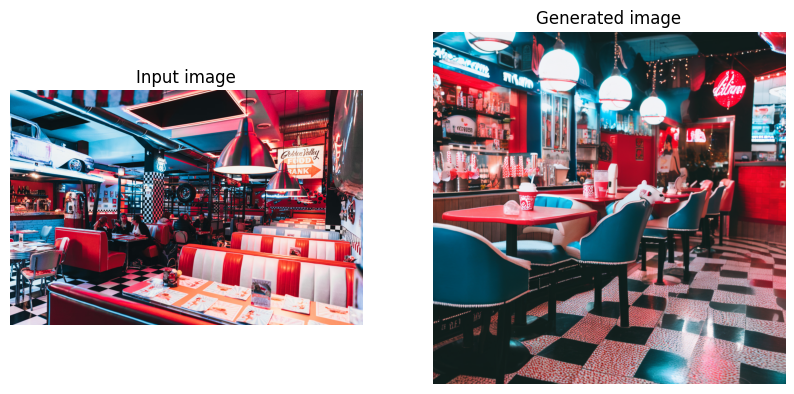

In [5]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(10, 9))
axis[0].imshow(image)
axis[0].set_axis_off()
axis[0].set_title("Input image")

axis[1].imshow(gen_image)
axis[1].set_axis_off()
axis[1].set_title("Generated image")


fig.show()

#### Image-to-Image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_5353/3599788593.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


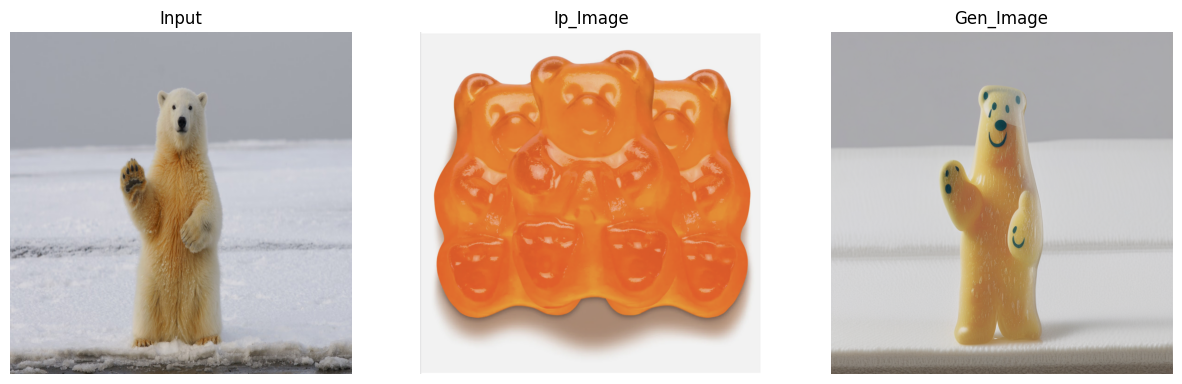

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
from PIL import Image

pipeline = AutoPipelineForImage2Image.from_pretrained(
  "stabilityai/stable-diffusion-xl-base-1.0",
  torch_dtype=torch.float16
).to(t_device)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name="ip-adapter_sdxl.bin"
)
pipeline.set_ip_adapter_scale(0.8)

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_bear_1.png")
ip_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_gummy.png")

new_size = (1024, 1024)
image = image.resize(new_size, Image.LANCZOS)
ip_image = ip_image.resize(new_size, Image.LANCZOS)


gen_image = pipeline(
    prompt="best quality, high quality",
    image=image,
    ip_adapter_image=ip_image,
    strength=0.5,
).images[0]

import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize=(12, 8))

axis[0].imshow(image)
axis[0].set_axis_off()
axis[0].set_title("Input")

axis[1].imshow(ip_image)
axis[1].set_axis_off()
axis[1].set_title("Ip_Image")

axis[2].imshow(gen_image)
axis[2].set_axis_off()
axis[2].set_title("Gen_Image")

fig.show()


### In-painting

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_5353/515437723.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


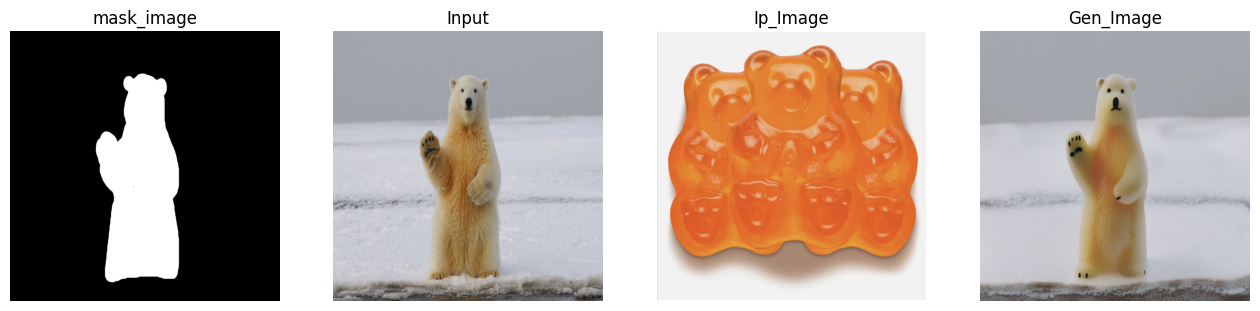

In [36]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import matplotlib.pyplot as plt

from PIL import Image

pipeline = AutoPipelineForImage2Image.from_pretrained(
  "stabilityai/stable-diffusion-xl-base-1.0",
  torch_dtype=torch.float16
).to(t_device)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name="ip-adapter_sdxl.bin"
)
pipeline.set_ip_adapter_scale(0.6)

mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_mask.png")
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_bear_1.png")
ip_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_gummy.png")

new_size = (1024, 1024)
mask_image = mask_image.resize(new_size, Image.LANCZOS)
image = image.resize(new_size, Image.LANCZOS)
ip_image = ip_image.resize(new_size, Image.LANCZOS)

gen_image = pipeline(
    prompt="a cute gummy bear waving",
    image=image,
    mask_image=mask_image,
    ip_adapter_image=ip_image,
).images[0]


# -----
fig, axis = plt.subplots(1, 4, figsize=(16, 8))

axis[0].imshow(mask_image)
axis[0].set_axis_off()
axis[0].set_title("mask_image")

axis[1].imshow(image)
axis[1].set_axis_off()
axis[1].set_title("Input")

axis[2].imshow(ip_image)
axis[2].set_axis_off()
axis[2].set_title("Ip_Image")

axis[3].imshow(gen_image)
axis[3].set_axis_off()
axis[3].set_title("Gen_Image")

fig.show()

#### video

In [7]:
import torch
from diffusers import AnimateDiffPipeline, DDIMScheduler, MotionAdapter
from diffusers.utils import export_to_gif
from diffusers.utils import load_image
from PIL import Image
from diffusers.utils import export_to_video

adapter = MotionAdapter.from_pretrained(
  "guoyww/animatediff-motion-adapter-v1-5-2",
  torch_dtype=torch.float16
)
pipeline = AnimateDiffPipeline.from_pretrained(
  "emilianJR/epiCRealism",
  motion_adapter=adapter,
  torch_dtype=torch.float16
)
scheduler = DDIMScheduler.from_pretrained(
    "emilianJR/epiCRealism",
    subfolder="scheduler",
    clip_sample=False,
    timestep_spacing="linspace",
    beta_schedule="linear",
    steps_offset=1,
)
pipeline.scheduler = scheduler
pipeline.enable_vae_slicing()
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15.bin")
# pipeline.enable_model_cpu_offload()
pipeline.to(t_device)

ip_adapter_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_inpaint.png")
new_size = (256, 256)
ip_adapter_image = ip_adapter_image.resize(new_size, Image.LANCZOS)

out_frames = pipeline(
    prompt="A cute gummy bear waving",
    negative_prompt="bad quality, worse quality, low resolution",
    ip_adapter_image=ip_adapter_image,
    num_frames=16,
    guidance_scale=7.5,
    num_inference_steps=50,
).frames[0]

export_to_video(out_frames, "./temp/ip_adapter_video_output.mp4", fps=26)

The config attributes {'motion_activation_fn': 'geglu', 'motion_attention_bias': False, 'motion_cross_attention_dim': None} were passed to MotionAdapter, but are not expected and will be ignored. Please verify your config.json configuration file.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

'./temp/ip_adapter_video_output.mp4'

### Model variants :: IP-Adapter Plus

In [8]:
import torch
from transformers import CLIPVisionModelWithProjection
from diffusers import AutoPipelineForText2Image

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "h94/IP-Adapter",
    subfolder="models/image_encoder",
    torch_dtype=torch.float16
)

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    image_encoder=image_encoder,
    torch_dtype=torch.float16
).to(t_device)

pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name="ip-adapter-plus_sdxl_vit-h.safetensors"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Model variants:: IP-Adapter FaceID

In [11]:
import torch
from diffusers import AutoPipelineForText2Image

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to(t_device)

pipeline.load_ip_adapter(
  "h94/IP-Adapter-FaceID",
  subfolder=None,
  weight_name="ip-adapter-faceid_sdxl.bin",
  image_encoder_folder=None
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ip-adapter-faceid_sdxl.bin:   0%|          | 0.00/1.07G [00:00<?, ?B/s]

image_encoder is not loaded since `image_encoder_folder=None` passed. You will not be able to use `ip_adapter_image` when calling the pipeline with IP-Adapter.Use `ip_adapter_image_embeds` to pass pre-generated image embedding instead.
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


In [13]:
from transformers import CLIPVisionModelWithProjection
from diffusers import AutoPipelineForText2Image

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "laion/CLIP-ViT-H-14-laion2B-s32B-b79K",
    torch_dtype=torch.float16,
)

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    image_encoder=image_encoder,
    torch_dtype=torch.float16
).to(t_device)

pipeline.load_ip_adapter(
  "h94/IP-Adapter-FaceID",
  subfolder=None,
  weight_name="ip-adapter-faceid-plus_sd15.bin"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ip-adapter-faceid-plus_sd15.bin:   0%|          | 0.00/157M [00:00<?, ?B/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


## Image embeddings ***

In [23]:
import torch
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image
from PIL import Image

pipeline = AutoPipelineForText2Image.from_pretrained(
  "stabilityai/stable-diffusion-xl-base-1.0",
  torch_dtype=torch.float16
).to(t_device)

pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name="ip-adapter_sdxl.bin"
)

ip_adapter_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_inpaint.png")
new_size = (512, 512)
ip_adapter_image = ip_adapter_image.resize(new_size, Image.LANCZOS)

image_embeds = pipeline.prepare_ip_adapter_image_embeds(
    ip_adapter_image=ip_adapter_image,
    ip_adapter_image_embeds=None,
    device=t_device,
    num_images_per_prompt=1,
    do_classifier_free_guidance=True,
)

torch.save(image_embeds, "./temp/image_embeds.ipadpt")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

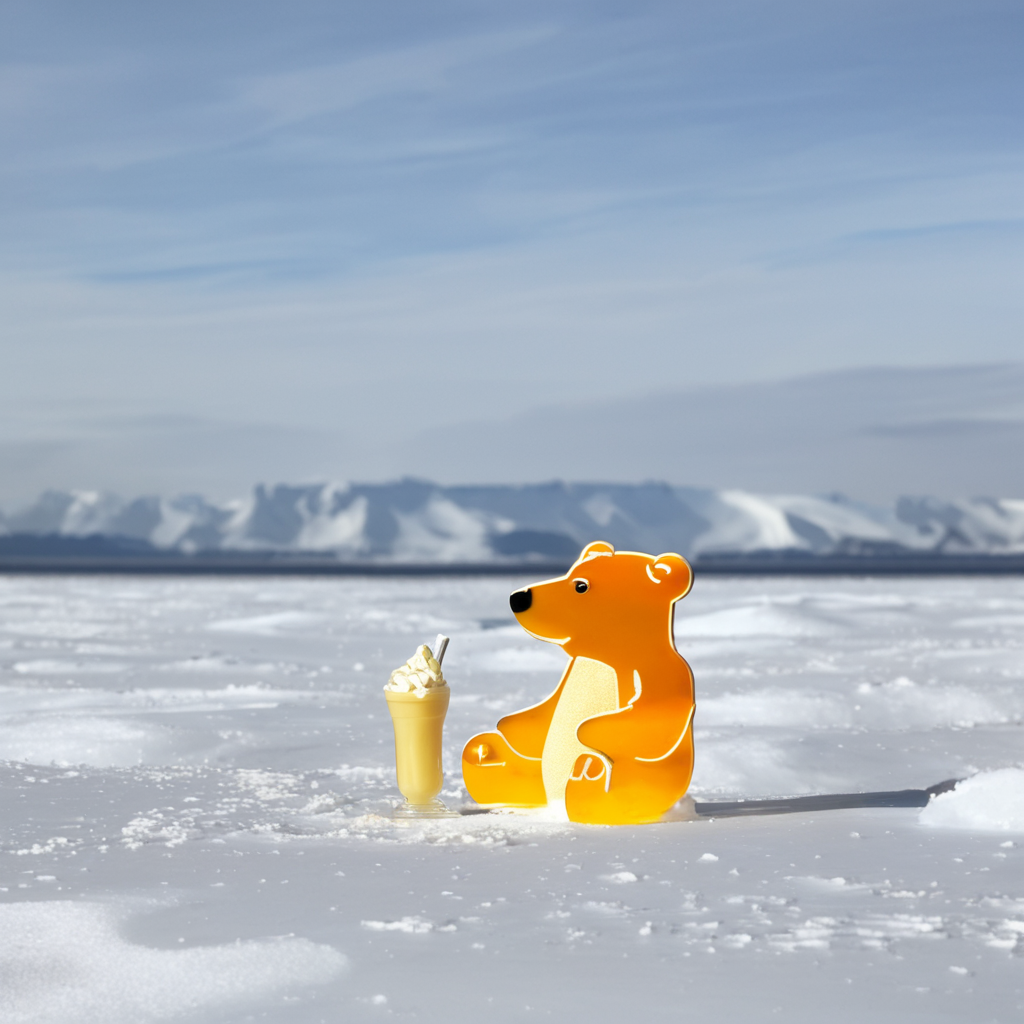

In [24]:
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  image_encoder_folder=None,
  weight_name="ip-adapter_sdxl.bin"
)
pipeline.set_ip_adapter_scale(0.8)
image_embeds = torch.load("./temp/image_embeds.ipadpt")
pipeline(
    prompt="a polar bear sitting in a chair drinking a milkshake",
    ip_adapter_image_embeds=image_embeds,
    negative_prompt="deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality",
    num_inference_steps=100,
    # generator=generator,
).images[0]

## Masking

In [69]:
import torch
from diffusers import AutoPipelineForText2Image
from diffusers.image_processor import IPAdapterMaskProcessor
from diffusers.utils import load_image

pipeline = AutoPipelineForText2Image.from_pretrained(
  "stabilityai/stable-diffusion-xl-base-1.0",
  torch_dtype=torch.float16
).to(t_device)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [70]:
wo_gen_image = pipeline(
  prompt="2 girls",
  negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [71]:
from PIL import Image

mask1 = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_mask1.png")
mask2 = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_mask2.png")

processor = IPAdapterMaskProcessor()
masks = processor.preprocess([mask1, mask2], height=1024, width=1024)

face_image1 = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_girl1.png")
face_image2 = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_girl2.png")

# new_size = (640, 640)
# face_image1 = face_image1.resize(new_size, Image.LANCZOS)
# face_image2 = face_image2.resize(new_size, Image.LANCZOS)

# pipeline.load_ip_adapter(
#   "h94/IP-Adapter",
#   subfolder="sdxl_models",
#   weight_name=["ip-adapter-plus-face_sdxl_vit-h.safetensors"]
# )

# pipeline.load_ip_adapter(
#   "h94/IP-Adapter",
#   subfolder="sdxl_models",
#   weight_name=["ip-adapter_sdxl_vit-h.safetensors"]
# )

pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.safetensors")

pipeline.set_ip_adapter_scale([[0.7, 0.7]])

ip_images = [[face_image1, face_image2]]
masks = [masks.reshape(1, masks.shape[0], masks.shape[2], masks.shape[3])]

gen_image = pipeline(
  prompt="2 girls",
  ip_adapter_image=ip_images,
  # ip_adapter_image=face_image1,
  negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
  cross_attention_kwargs={"ip_adapter_masks": masks}
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_8038/1061308875.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


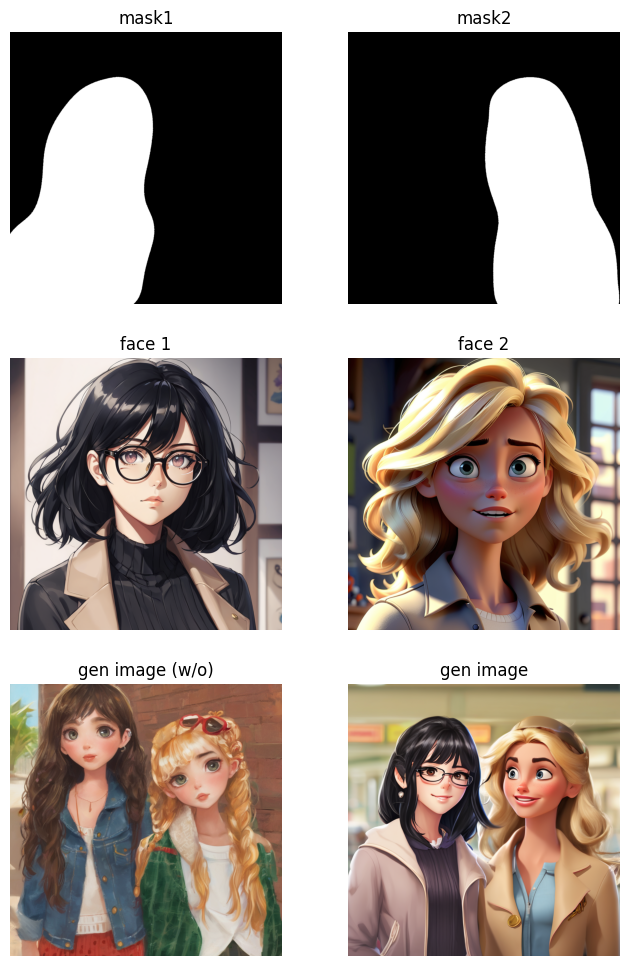

In [72]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3, 2, figsize=(8, 12))
axis[0,0].imshow(mask1)
axis[0,0].set_axis_off()
axis[0,0].set_title("mask1")

axis[0,1].imshow(mask2)
axis[0,1].set_axis_off()
axis[0,1].set_title("mask2")

axis[1,0].imshow(face_image1)
axis[1,0].set_axis_off()
axis[1,0].set_title("face 1")


axis[1,1].imshow(face_image2)
axis[1,1].set_axis_off()
axis[1,1].set_title("face 2")


axis[2,0].imshow(wo_gen_image)
axis[2,0].set_axis_off()
axis[2,0].set_title("gen image (w/o)")


axis[2,1].imshow(gen_image)
axis[2,1].set_axis_off()
axis[2,1].set_title("gen image")


fig.show()


## Applications

#### h94/IP-Adapter

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image
import matplotlib.pyplot as plt

pipeline = StableDiffusionPipeline.from_pretrained(
  "stable-diffusion-v1-5/stable-diffusion-v1-5",
  torch_dtype=torch.float16,
).to(t_device)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="models",
  weight_name="ip-adapter-full-face_sd15.bin"
)

pipeline.set_ip_adapter_scale(0.5)
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_einstein_base.png")



fig.show()

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Generated Image')

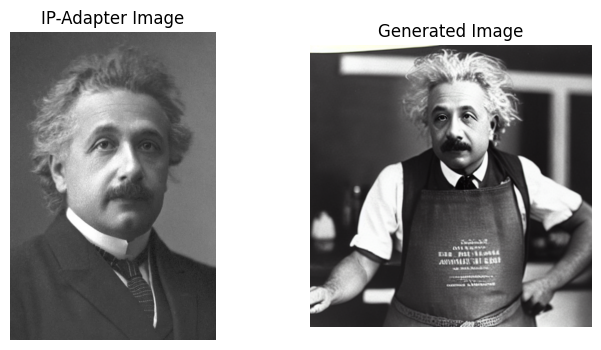

In [ ]:
gen_image = pipeline(
    prompt="A photo of Einstein as a chef, wearing an apron, cooking in a Korean restaurant",
    ip_adapter_image=image,
    negative_prompt="lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=100,
).images[0]

fig, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].imshow(image)
axis[0].set_axis_off()
axis[0].set_title("IP-Adapter Image")

axis[1].imshow(gen_image)
axis[1].set_axis_off()
axis[1].set_title("Generated Image")

In [87]:
# pip install insightface
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image
from insightface.app import FaceAnalysis
import cv2
import numpy as np

pipeline = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
).to(t_device)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter(
  "h94/IP-Adapter-FaceID",
  subfolder=None,
  weight_name="ip-adapter-faceid_sd15.bin",
  image_encoder_folder=None
)
pipeline.set_ip_adapter_scale(0.6)

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_girl1.png")

ref_images_embeds = []
app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))
image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)
faces = app.get(image)
image = torch.from_numpy(faces[0].normed_embedding)
ref_images_embeds.append(image.unsqueeze(0))
ref_images_embeds = torch.stack(ref_images_embeds, dim=0).unsqueeze(0)
neg_ref_images_embeds = torch.zeros_like(ref_images_embeds)
id_embeds = torch.cat([neg_ref_images_embeds, ref_images_embeds]).to(dtype=torch.float16, device=t_device)

gen_image = pipeline(
    prompt="A photo of a girl",
    ip_adapter_image_embeds=[id_embeds],
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
).images[0]

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ip-adapter-faceid_sd15.bin:   0%|          | 0.00/96.7M [00:00<?, ?B/s]

image_encoder is not loaded since `image_encoder_folder=None` passed. You will not be able to use `ip_adapter_image` when calling the pipeline with IP-Adapter.Use `ip_adapter_image_embeds` to pass pre-generated image embedding instead.
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


download_path: /Users/hyunjae.k/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:49<00:00, 5653.64KB/s]
/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/hyunjae.k/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/hyunjae.k/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/hyunjae.k/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/hyunjae.k/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/hyunjae.k/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112,

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Generated Image')

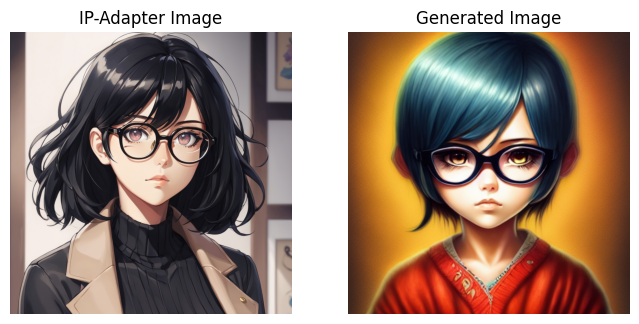

In [98]:
import matplotlib.pyplot as plt

gen_image = pipeline(
    prompt="A photo of a girl with the style of pencil painting",
    ip_adapter_image_embeds=[id_embeds],
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
).images[0]

ip_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_mask_girl1.png")

fig, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].imshow(ip_image)
axis[0].set_axis_off()
axis[0].set_title("IP-Adapter Image")

axis[1].imshow(gen_image)
axis[1].set_axis_off()
axis[1].set_title("Generated Image")

### Multiple IP-Adapters

In [2]:
import torch
from diffusers import AutoPipelineForText2Image, DDIMScheduler
from transformers import CLIPVisionModelWithProjection
from diffusers.utils import load_image

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "h94/IP-Adapter",
    subfolder="models/image_encoder",
    torch_dtype=torch.float16,
)

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    image_encoder=image_encoder,
)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name=["ip-adapter-plus_sdxl_vit-h.safetensors", "ip-adapter-plus-face_sdxl_vit-h.safetensors"]
)
pipeline.set_ip_adapter_scale([0.7, 0.3])
# enable_model_cpu_offload to reduce memory usage
# pipeline.enable_model_cpu_offload()
pipeline.to(t_device)

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:
face_image = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/women_input.png")
style_folder = "https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/style_ziggy"
style_images = [load_image(f"{style_folder}/img{i}.png") for i in range(10)]

In [18]:
generator = torch.Generator(device="cpu").manual_seed(0)

gen_img = pipeline(
    prompt="wonder woman with shield and sword",
    ip_adapter_image=[style_images, face_image],
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Generated Image')

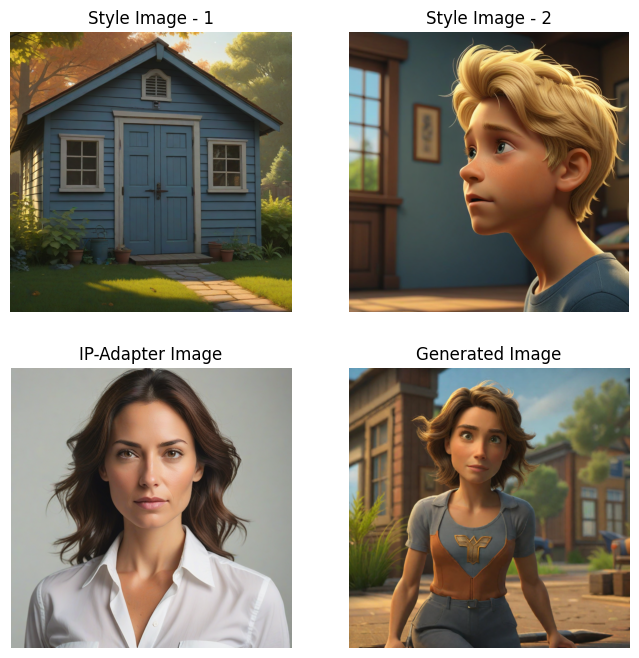

In [19]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2, 2, figsize=(8, 8))
axis[0, 0].imshow(style_images[0])
axis[0, 0].set_axis_off()
axis[0, 0].set_title("Style Image - 1")

axis[0, 1].imshow(style_images[1])
axis[0, 1].set_axis_off()
axis[0, 1].set_title("Style Image - 2")

axis[1, 0].imshow(face_image)
axis[1, 0].set_axis_off()
axis[1, 0].set_title("IP-Adapter Image")

axis[1, 1].imshow(gen_img)
axis[1, 1].set_axis_off()
axis[1, 1].set_title("Generated Image")

### Instant Generation

In [20]:
import torch
from diffusers import DiffusionPipeline, LCMScheduler
from diffusers.utils import load_image

pipeline = DiffusionPipeline.from_pretrained(
  "sd-dreambooth-library/herge-style",
  torch_dtype=torch.float16
)

pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="models",
  weight_name="ip-adapter_sd15.bin"
)
pipeline.load_lora_weights("latent-consistency/lcm-lora-sdv1-5")
pipeline.scheduler = LCMScheduler.from_config(pipeline.scheduler.config)
# enable_model_cpu_offload to reduce memory usage
# pipeline.enable_model_cpu_offload()
pipeline.to(t_device)

pipeline.set_ip_adapter_scale(0.4)



model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/hyunjae.k/.cache/huggingface/hub/models--sd-dreambooth-library--herge-style/snapshots/33888ec1b1cb44429533e2ce41a9c927c94dff20/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/hyunjae.k/.cache/huggingface/hub/models--sd-dreambooth-library--herge-style/snapshots/33888ec1b1cb44429533e2ce41a9c927c94dff20/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/hyunjae.k/.cache/huggingface/hub/models--sd-dreambooth-library--herge-style/snapshots/33888ec1b1cb44429533e2ce41a9c927c94dff20/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/hyunjae.k/.cache/huggingface/hub/models--sd-dreambooth-library--herge-style/snapshots/33888ec1b1cb44429533e2ce41a9c927c94dff20/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


pytorch_lora_weights.safetensors:   0%|          | 0.00/135M [00:00<?, ?B/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_33061/4277454934.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


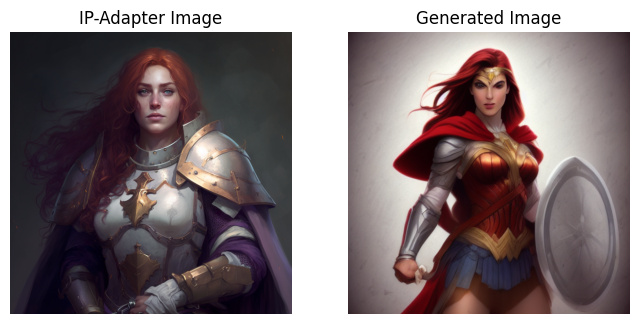

In [30]:
# prompt = "herge_style woman in armor, best quality, high quality"
prompt = "pencil-painting_style with black and white,  wonder woman in armor with shield and long sword , best quality, high quality"

ip_adapter_image = load_image("https://user-images.githubusercontent.com/24734142/266492875-2d50d223-8475-44f0-a7c6-08b51cb53572.png")
gen_img = pipeline(
    prompt=prompt,
    ip_adapter_image=ip_adapter_image,
    num_inference_steps=4,
    guidance_scale=1,
).images[0]

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].imshow(ip_adapter_image)
axis[0].set_axis_off()
axis[0].set_title("IP-Adapter Image")

axis[1].imshow(gen_img)
axis[1].set_axis_off()
axis[1].set_title("Generated Image")
fig.show()

#### Structural control

In [31]:
import torch
from diffusers.utils import load_image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

controlnet = ControlNetModel.from_pretrained(
  "lllyasviel/control_v11f1p_sd15_depth",
  torch_dtype=torch.float16
)

pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
).to(t_device)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="models",
  weight_name="ip-adapter_sd15.bin"
)



config.json:   0%|          | 0.00/945 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_33061/755149709.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


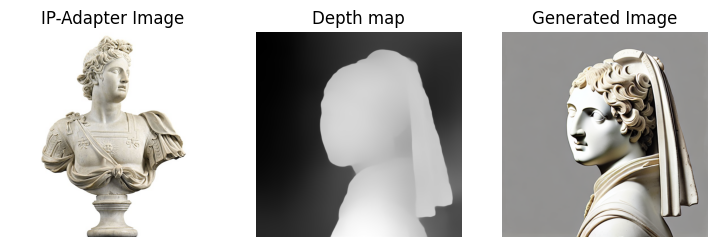

In [33]:
ip_adapter_image = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/statue.png")
depth_map = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/depth.png")

gen_img = pipeline(
  prompt="best quality, high quality",
  image=depth_map,
  ip_adapter_image=ip_adapter_image,
  negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
).images[0]

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 3, figsize=(9, 3))
axis[0].imshow(ip_adapter_image)
axis[0].set_axis_off()
axis[0].set_title("IP-Adapter Image")

axis[1].imshow(depth_map)
axis[1].set_axis_off()
axis[1].set_title("Depth map")

axis[2].imshow(gen_img)
axis[2].set_axis_off()
axis[2].set_title("Generated Image")
fig.show()

### Style and layout control

In [34]:
import torch
from diffusers import AutoPipelineForText2Image
from diffusers.utils import load_image

pipeline = AutoPipelineForText2Image.from_pretrained(
  "stabilityai/stable-diffusion-xl-base-1.0",
  torch_dtype=torch.float16
).to(t_device)
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder="sdxl_models",
  weight_name="ip-adapter_sdxl.bin"
)

scale = {
    "down": {"block_2": [0.0, 1.0]},
    "up": {"block_0": [0.0, 1.0, 0.0]},
}
pipeline.set_ip_adapter_scale(scale)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_33061/3877803822.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


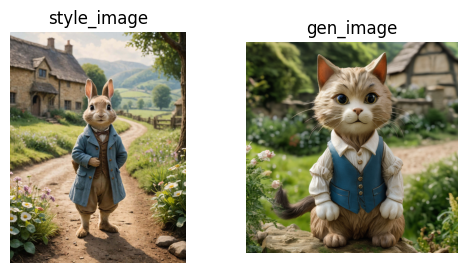

In [35]:
style_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg")

gen_image = pipeline(
    prompt="a cat, masterpiece, best quality, high quality",
    ip_adapter_image=style_image,
    negative_prompt="text, watermark, lowres, low quality, worst quality, deformed, glitch, low contrast, noisy, saturation, blurry",
    guidance_scale=5,
).images[0]

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize=(6, 3))
axis[0].imshow(style_image)
axis[0].set_axis_off()
axis[0].set_title("style_image")

axis[1].imshow(gen_image)
axis[1].set_axis_off()
axis[1].set_title("gen_image")

fig.show()